# Supernovae Analysis

In this section we will play with supernovae data, compare them with cosmological models and make cosmological fits. 

First thing to do is to import some librairies that will be needed to work

This is done with the "import" command. The first library we need is called "numpy" and allows to perform a large set of numerical operations on a variety of data structures (arrays, lists, ...) in python. We import this library under the domain name "np" so that all functions from numpy will only be accessible through the call to "np.function_name" in order not to mix them with another function that could have the same name in another library. We also need to import all functions from the pylab suite to make things easier from the syntax point of view. Finally, we also need to set the plotting output to this very page of your browser with nice plot size and fint sizes.

In [1]:
from pylab import *
import numpy as np
%matplotlib inline
from matplotlib import rc
rc('figure',figsize=(10,5))
rc('font',size=20)
rc('text',usetex=True)

The second library was written for the purpose of this course and contains a number of functions that will be useful to avoid long programming in the course. It is called "cosmoUOlib" and we shall import under the domain name "uo"

In [2]:
import cosmoUOlib as uo

ImportError: No module named cosmoUOlib

# First steps with python
We will do our first plot, which is related to cosmology. We want to plot the evolution of the density of various species (Radiation, Matter and Cosmological constant) as a finction of redshift. This was shown is the first lecture. We use the following values for the various densities as expressed today:

In [2]:
h = 0.7
omega_l = 0.7
omega_r = 4.3 * h**(-2) * 1e-5
omega_m= 0.3 - omega_r 


We recall that: $$\Omega(z) = \Omega_r (1 + z)^4 + \Omega_m (1 + z)^3 + \Omega_\Lambda$$

We define a array containg the redshifts that we want to look at with logarithmic spacing between 1e-1 and 1e4 and 1000 elements.

In [3]:
z = np.logspace(-1, 4, 1000)

We can directly calculate the densities using the redshift array as the following:

In [5]:
om_r = omega_r * (1 + z)**4
om_m = omega_m * (1 + z)**3
om_l = omega_l + z*0
total = om_r + om_m + om_l

Now let's do our first plot:

In [6]:
xscale('log')
yscale('log')
xlabel('Redshift')
ylabel(r'$\Omega(z)$')
plot(z,om_l, 'b', label = r'$\Omega_\Lambda(z)$')
plot(z,om_r, 'k', label = r'$\Omega_R(z)$')
plot(z,om_m, 'g', label = r'$\Omega_{NR}(z)$')
plot(z,total, 'r', lw=2, label = 'Total')
legend(loc='upper left')
title('Densities as a function of Redshift')

Text(0.5,1,'Densities as a function of Redshift')

Error in callback <function post_execute at 0x7fec5c1dc1b8> (for post_execute):


OSError: [Errno 2] No such file or directory: 'latex'

OSError: [Errno 2] No such file or directory: 'latex'

<Figure size 432x288 with 1 Axes>

We can easily find the values of the redshift of matter-radiation equality, or of lambda domination

In [84]:
zl = np.max(z[omega_l > (omega_m * (1 + z)**3)])
zeq = np.max(z[ (omega_m * (1 + z)**3) > (omega_r * (1 + z)**4 )])
print(zl)
print(zeq)

0.323974262953
3384.77285595


And overplot them to the initial plot

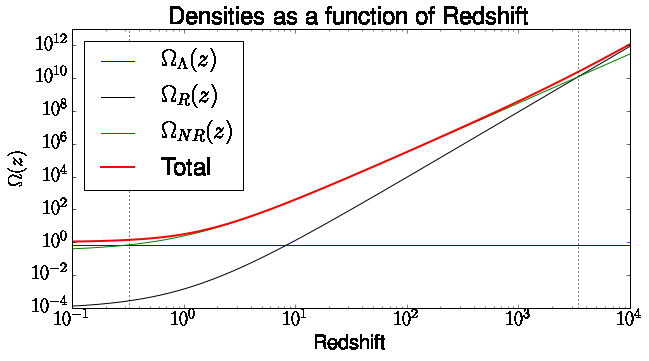

In [85]:
xscale('log')
yscale('log')
xlabel('Redshift')
ylabel(r'$\Omega(z)$')
plot(z,omega_l + z*0, 'b', label = r'$\Omega_\Lambda(z)$')
plot(z,omega_r * (1 + z)**4, 'k', label = r'$\Omega_R(z)$')
plot(z,omega_m * (1 + z)**3, 'g', label = r'$\Omega_{NR}(z)$')
plot(z,total, 'r', lw=2, label = 'Total')
legend(loc='upper left')
title('Densities as a function of Redshift')
plot([zl,zl], [1e-4,1e13],'k:')
plot([zeq,zeq], [1e-4,1e13],'k:')

Now you know how to make a simple plot from an array, and how to manipulate arrays and make operations with them.

# Cosmological Distances

We will first calculate and plot H(z) with 1000 values of z between 0 and 1 linearly spaced (function to use is linspace()) using the formula in the course for H(z) and the cosmological parameters set to the same values as above. You can also play with cosmological parameters to see the change. We recall that $$H(z)=H_0\sqrt{\Omega_k(1 + z)^2 + \Omega_\Lambda + \Omega_m (1 + z)^3}$$

Do it yourself in the following cell:

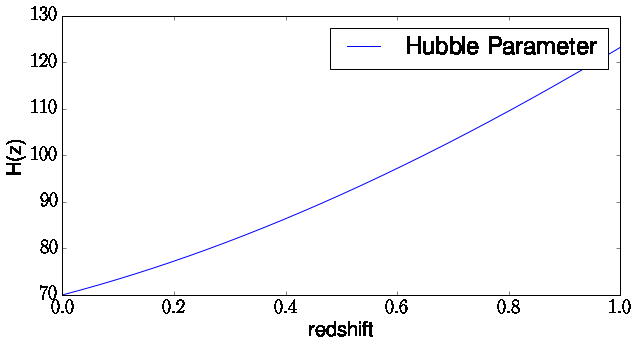

In [86]:
z = np.linspace(0,1,1000)
omega_m = 0.3
omega_l = 0.7
omega_tot = omega_m + omega_l
omega_k = 1. - omega_tot
H0 = 70.
hz = H0 * np.sqrt(omega_k * (1 + z)**2 + omega_l + omega_m * (1 + z)**3)
plot(z, hz, label='Hubble Parameter')
xlabel('redshift')
ylabel('H(z)')
legend()

Now we calculate the luminosity distance $$D_l(z) = c(1+z)\int_0^z \frac{\mathrm{d}z'}{H(z')}$$ using the numerical integration features of the scipy library (trapezoidal cumulative integral):

In [87]:
import scipy.integrate
z = np.linspace(0,1,1000)
omega_m = 0.3
omega_l = 0.7
omega_tot = omega_m + omega_l
omega_k = 1. - omega_tot
H0 = 70.
hz = H0 * np.sqrt(omega_k * (1 + z)**2 + omega_l + omega_m * (1 + z)**3)

dp = np.zeros(len(z))
dp[1:] = scipy.integrate.cumtrapz(1./hz, z) * 3e5

and you are asked to make a plot of Luminosity distance as a function of redshift in the following cell (remember that $D_L(z) = (1+z)\times D_p(z)$:

In [88]:
dl = (1+z) * dp

We can start using the "cosmoUOlib" in order to avoid writing explicielty the integrals. I have implemented a function "lumdist" that directly gives the luminosity distance for a redshift array and a set of cosmological parameters. We can compare the resulting values.

In the following plot, we compare the above calculated Luminosity distance with that from the library. They show consistent values although the one from the library is more accurate due to numerical subtleties that are irrelevant for this course.

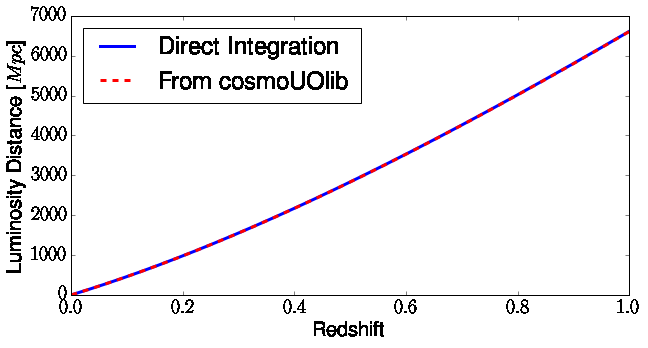

In [89]:
cosmo_lcdm = {'h':0.7, 'omega_M_0':0.3, 'omega_lambda_0':0.7, 'w0':-1.}
dl = uo.lumdist(z, cosmo_lcdm)

plot(z, dp*(1+z), lw=3, label = 'Direct Integration')
plot(z, dl, 'r--', lw=3, label = 'From cosmoUOlib')
xlabel('Redshift')
ylabel('Luminosity Distance [$Mpc$]')
legend(loc='upper left')

# Supernova data
We now dowload the supernova data that are stored in the file 'union2.1.txt'. It contains three colums redshift, Distance Modulus and Error on the latter. We make a plot with error bars using the function "errorbar()"

In [4]:
filename='SCPUnion2.1_mu_vs_z.txt'
zsn,musn,dmusn=np.loadtxt(filename,usecols=(1,2,3),unpack=True)

errorbar(zsn, musn, yerr=dmusn, fmt='ko')
xscale('log')
xlim(1e-2,2)
ylim(33,46)
xlabel('Redshift')
ylabel('Distance Modulus')

Text(0,0.5,'Distance Modulus')

Error in callback <function post_execute at 0x7f5beb7e2848> (for post_execute):


OSError: [Errno 2] No such file or directory: 'latex'

OSError: [Errno 2] No such file or directory: 'latex'

<Figure size 432x288 with 1 Axes>

The function "uo.musn1a()" has the same arguments as the function uo.lumdist above but returns the distance modulus for a given cosmological model instead of the luminosity distance.  Your are now asked to overplot by yourself three cosmological models on the above plot with the following parameters: $$\text{Flat Matter Only: }(h=0.7 ; \Omega_m=1 ; \Omega_\Lambda=0)$$ $$\text{Open Matter Only: }(h=0.7 ; \Omega_m=0.3 ; \Omega_\Lambda=0)$$ $$\Lambda\text{CDM : }(h=0.7 ; \Omega_m=0.3 ; \Omega_\Lambda=0.7)$$

You are asked to do it yourself in the follwing cell: You will need to define redshift array (bettween 0 and 2 for instance) and calculate the mudel for Distance Modulus for each of the above models, plot them with a legend.

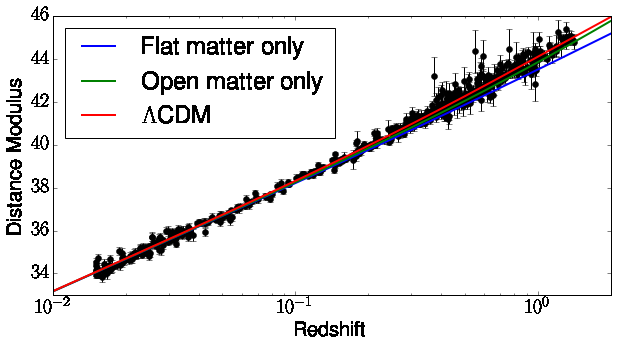

In [91]:
cosmo_lcdm = {'h':0.7, 'omega_M_0':0.3, 'omega_lambda_0':0.7, 'w0':-1.}
cosmo_flat = {'h':0.7, 'omega_M_0':1, 'omega_lambda_0':0, 'w0':-1.}
cosmo_open = {'h':0.7, 'omega_M_0':0.3, 'omega_lambda_0':0, 'w0':-1.}

errorbar(zsn, musn, yerr=dmusn, fmt='ko')
zvalues = linspace(0,2,10000)
plot(zvalues, uo.musn1a(zvalues, cosmo_flat), lw=2, color='blue', 
     label='Flat matter only')
plot(zvalues, uo.musn1a(zvalues, cosmo_open), lw=2, color='green', 
     label='Open matter only')
plot(zvalues, uo.musn1a(zvalues, cosmo_lcdm), lw=2, color='red', 
     label='$\Lambda$CDM')
xscale('log')
xlim(1e-2,2)
ylim(33,46)
xlabel('Redshift')
ylabel('Distance Modulus')
legend(loc='upper left')



We now want to calculate the $\chi^2$ for each of the model with the data. For this we will need to calculate the distance modulus at each of the Supernova Data redshift instead of the regular grid. This is easily done by just replacing the gridded redshift "z" by the array from the SN file "zsn" in the "uo.musn1a()" function. This is the occasion to learn how to calculate a $\chi^2$ and to see how to display the value of a variable in the legend using formatted output (similar to what is used in Fortran programming language).

In [92]:
cosmo_flat = {'h':0.7, 'omega_M_0':1, 'omega_lambda_0':0, 'w0':-1.}
chi2 = np.sum(((musn - uo.musn1a(zsn, cosmo_flat))/dmusn)**2)
print(chi2)

2136.06316578


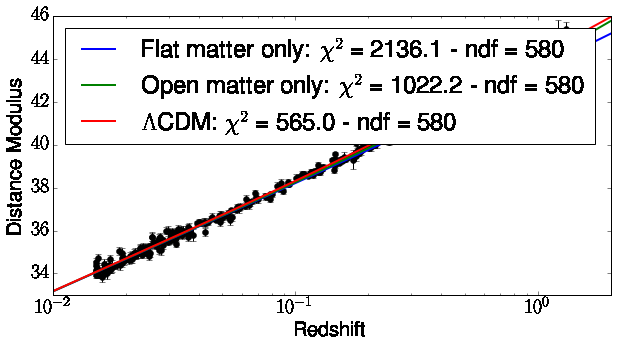

In [93]:
cosmo_lcdm = {'h':0.7, 'omega_M_0':0.3, 'omega_lambda_0':0.7, 'w0':-1.}
cosmo_flat = {'h':0.7, 'omega_M_0':1, 'omega_lambda_0':0, 'w0':-1.}
cosmo_open = {'h':0.7, 'omega_M_0':0.3, 'omega_lambda_0':0, 'w0':-1.}

chi2_flat = np.sum( (musn - uo.musn1a(zsn, cosmo_flat))**2/dmusn**2)
chi2_open = np.sum( (musn - uo.musn1a(zsn, cosmo_open))**2/dmusn**2)
chi2_lcdm = np.sum( (musn - uo.musn1a(zsn, cosmo_lcdm))**2/dmusn**2)

errorbar(zsn, musn, yerr=dmusn, fmt='ko')
zvalues = linspace(0,2,10000)
plot(zvalues, uo.musn1a(zvalues, cosmo_flat), lw=2, color='blue', 
     label='Flat matter only: $\chi^2$ = {0:5.1f} - ndf = {1:}'.format(chi2_flat,len(zsn)))
plot(zvalues, uo.musn1a(zvalues, cosmo_open), lw=2, color='green', 
     label='Open matter only: $\chi^2$ = {0:5.1f} - ndf = {1:}'.format(chi2_open,len(zsn)))
plot(zvalues, uo.musn1a(zvalues, cosmo_lcdm), lw=2, color='red', 
     label='$\Lambda$CDM: $\chi^2$ = {0:5.1f} - ndf = {1:}'.format(chi2_lcdm,len(zsn)))
xscale('log')
xlim(1e-2,2)
ylim(33,46)
xlabel('Redshift')
ylabel('Distance Modulus')
legend(loc='upper left')

The red curve is obviously better then the others... Its $\chi^2/ndf$ is significantly better than the two others and is consistent with the expected value of 1.

### Fitting with iMinuit

In order to use iMinuit, we need to define a finction with a imposed shape (input and outputs) so that iMinuit can work. This function is supposed to give the value of the function to fit at some abscissa points for a given set of parameters. Here is it very easy to define:

In [94]:
def newmusn(x, pars):
    cosmo = {'h':pars[0], 'omega_M_0':pars[1], 
             'omega_lambda_0':pars[2], 'w0':pars[3]}
    val = uo.musn1a(x, cosmo)
    val[isnan(val)] = -1e30
    return val

The fitting will need some initial guess, we will choose $$(h=0.7 ; \Omega_m=0.27 ; \Omega_\Lambda=0.73 ; w=-1)$$
We also choose to fix some of the parameters (with the fixpars keyword):
- $H_0$ is not constrained at all by SNIa so we fix it
- $w$ can be constrained by SNIa but we choose here not to include it in the analysis as it makes things more complicated. We fix it to -1

In [95]:
guess = [0.7, 0.27, 0.73, -1.]
resfit_omol = uo.do_minuit(zsn,musn,dmusn,guess,functname=newmusn, 
                           fixpars = [True, False, False, True])

Fitting with Minuit
{'fix_c0': True, 'fix_c3': True, 'fix_c2': False, 'c3': -1.0, 'c2': 0.73, 'c1': 0.27, 'c0': 0.7, 'fix_c1': False}


FCN = 562.22668102 
 TOTAL NCALL = 42 
 NCALLS = 42 
 
 
 EDM = 6.20586399854e-11 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,c0,7.000000e-01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
2,c1,2.785313e-01,6.285583e-02,0.000000e+00,0.000000e+00,,,
3,c2,7.233642e-01,8.198301e-02,0.000000e+00,0.000000e+00,,,
4,c3,-1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,c0,7.000000e-01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
2,c1,2.785313e-01,6.285581e-02,0.000000e+00,0.000000e+00,,,
3,c2,7.233642e-01,8.198299e-02,0.000000e+00,0.000000e+00,,,
4,c3,-1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED


+,c1,c2
c1,1.00,0.93
c2,0.93,1.00


('Chi2=', 562.22668102032139)
('ndf=', 576)




We are happy to find the expected 0.28 and 0.72 for $\Omega_m$ and $\Omega_\Lambda$ with a satisfying $\chi^2/ndf$

The Minuit implementation we have here returns in a list the fitting function, the value of the fitted parameters, their error bars and the covariance matrix:

The Minuit implementation we have here returns in a list a minuit object, the fitted parameters, their error bars and their covariance matrix.

In [96]:
print(resfit_omol[0])
print(resfit_omol[1])
print(resfit_omol[2])
print(resfit_omol[3])

[ 0.7         0.27853126  0.72336422 -1.        ]
[ 0.          0.06285581  0.08198299  0.        ]
[[ 0.00395085  0.00479908]
 [ 0.00479908  0.00672121]]


The error bars and covariance matrices are a useful measurement of the confidence intervals, but in the case these are complicated and non gaussian, and particularly when there are a large number of dimensions, this simple fitting approach is a bit limited. It only gives the best-fit value, but we would like to visualize the shape of the confidence intervals in multi-dimensions...

This is where Monte-Carlo-Markov-Chain become useful...

# Monte-Carlo-Markov-Chain

The theory is very simple and based on the Metropolis-Hastings algorithm that allows to build a chain of parameter vlues that has been proven to sample the posterior probability of the corresponding likelihood (data and model).

In simpler words: we will build samples of the parameters whose distribution show the confidence intervals of these parameters given our data and the model (and the error bars on the data of course).

I have implemented functions within the "uo" library that can easily allow you to run MCMC and display the results.

First define an data object that contains the data, the error bars and the model. This object is used to calculate the likelihood for a given set of parameters.

In [97]:
data = uo.Data(xvals=zsn, yvals=musn, errors=dmusn, model=newmusn)

We now run the MCMC (this can take a while...). It tries various randomly chosen combinations of the parameterrs and keeps them or not in the chain according to the Metropolis-Hastings algorithm, so that at the end the sampling of the likelihood is done. The first samples are automatically rejected at the end as the chain takes some time to thermalize itslef (the number of samples t reject is known as the "burnout").

We only run the MCMC on $\Omega_m$ and $\Omega_\Lambda$ (you can try to open with $w$ afterwards, but remember that SNIa do not constrain $h$ so if you open $h$ you will see a uniform distribution for $h$).

In [98]:
chainomol = uo.run_mcmc(data, variables=['om', 'ol'])

 [-----------------100%-----------------] 80000 of 80000 complete in 38.7 sec

Let's see the results by plotting the sampled values of $\Omega_\Lambda$ as a function of those of $\Omega_m$ (we overplot in green the values fitted with Minuit to check the consistency):

(<iminuit._libiminuit.Minuit object at 0x129391050>, array([ 0.7       ,  0.27853126,  0.72336422, -1.        ]), array([ 0.        ,  0.06285581,  0.08198299,  0.        ]), array([[ 0.00395085,  0.00479908],
       [ 0.00479908,  0.00672121]]))


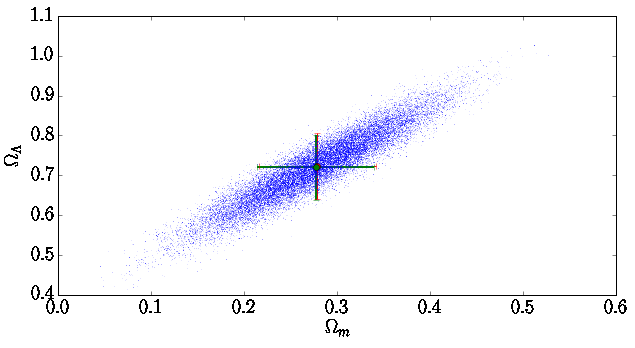

In [99]:
print(resfit_omol)
plot(chainomol['om'], chainomol['ol'],',', alpha=0.1)
errorbar(resfit_omol[1][1], resfit_omol[1][2], xerr=resfit_omol[2][1], 
         yerr=resfit_omol[2][2],fmt='ro')
errorbar(mean(chainomol['om']), mean(chainomol['ol']), 
      xerr=std(chainomol['om']), yerr=std(chainomol['ol']), fmt='go',lw=2)
xlabel('$\Omega_m$')
ylabel('$\Omega_\Lambda$')

Does that look familiar ?

It is convenient to plot these distributions as 2D histograms, as well as 1D histograms.

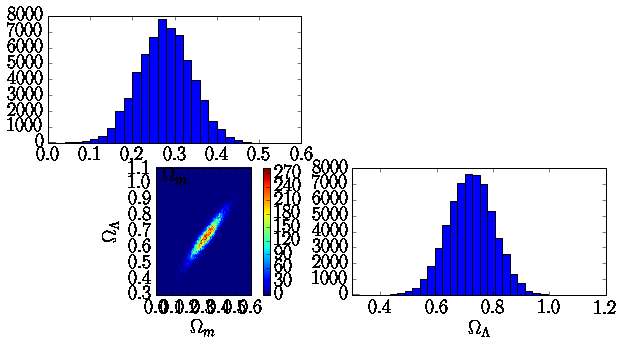

In [100]:
min_om = 0.
max_om = 0.6
min_ol = 0.3
max_ol = 1.1
subplot(2,2,3)
im2d = hist2d(chainomol['om'], chainomol['ol'], bins=100, 
              range=[[min_om,max_om],[min_ol, max_ol]])[0]
imshow(im2d, interpolation='nearest', origin='lower', 
       extent = (min_om, max_om, min_ol, max_ol))
colorbar()
xlabel('$\Omega_m$')
ylabel('$\Omega_\Lambda$')
subplot(2,2,4)
hist(chainomol['ol'], bins=30, range=[min_ol, max_ol])
xlabel('$\Omega_\Lambda$')
subplot(2,2,1)
hist(chainomol['om'], bins=30, range=[min_om, max_om])
xlabel('$\Omega_m$')


I have prepared a nicer for you in the "uo" library:

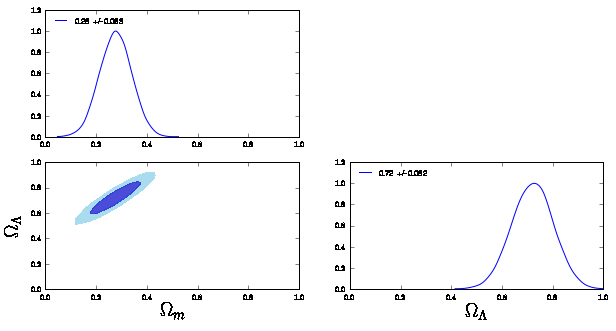

In [101]:
sm = 3
uo.matrixplot(chainomol, ['om', 'ol'], 'blue', sm, 
              limits = [[0,1], [0,1.]], labels=['$\Omega_m$','$\Omega_\Lambda$'])

Let's now see what happens if we open $w$ parameter:

In [102]:
chain_all = uo.run_mcmc(data, variables=['om', 'ol', 'w'])

 [-----------------100%-----------------] 80000 of 80000 complete in 51.2 sec

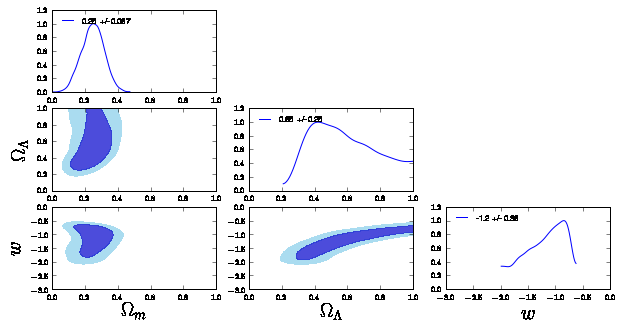

In [103]:
sm=10.
uo.matrixplot(chain_all, ['om', 'ol', 'w'], 'blue', sm,
              limits = [[0,1], [0,1.],[-3,0]],
    labels=['$\Omega_m$','$\Omega_\Lambda$','$w$'])

We see the huge degeneracies that appear, this is why in Cosmology, we usually like to combine different dataset together in order to have complementary constraints and reduce the degeneracy. On the parameters shown here, the CMB helps a lot as we will see in the following.

In [104]:
chain_all = uo.run_mcmc(data, variables=['h','om', 'ol', 'w'])

 [-----------------100%-----------------] 80000 of 80000 complete in 33.2 sec

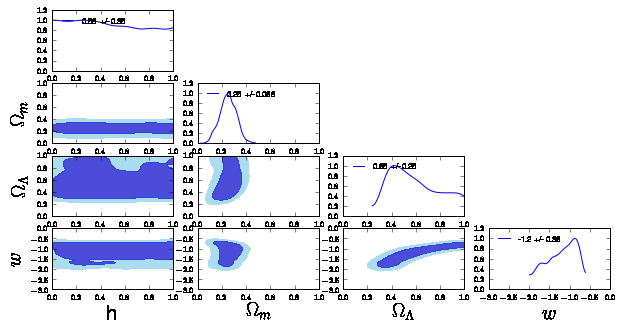

In [105]:
sm=10.
uo.matrixplot(chain_all, ['h','om', 'ol', 'w'], 'blue', sm,
              limits = [[0,1],[0,1], [0,1.],[-3,0]],
    labels=['h','$\Omega_m$','$\Omega_\Lambda$','$w$'])